In [14]:
# plot Jaccard distances between simple set of molecules
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [15]:
# chose a list of SMILES
SMI = ["c1ccccc1O", "c1ccccc1OC", "c1ccccc1", "COc1cc(OC)cc(OC)c1", "COC=CC=CC=C"]
mols = [Chem.MolFromSmiles(smi) for smi in SMI]

# get the list of corresponding MorganFPs
FPs = [AllChem.GetMorganFingerprint(mol, radius=2) for mol in mols]

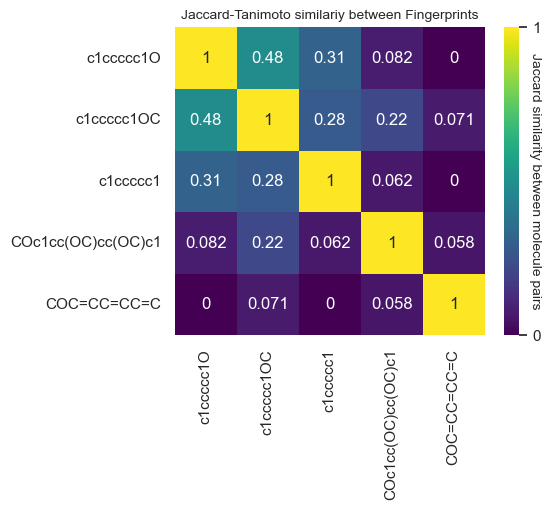

In [44]:
# define a matrix of similarity for the list of SMILES considered
sim_fp = np.zeros((len(SMI), len(SMI)))

# build this matrix by computing Jaccard-Tanimoto Similarities between all FPs pairs
for i in range(len(FPs)):
    for j in range(len(FPs)):
        sim_fp[i,j] = DataStructs.TanimotoSimilarity(FPs[i],FPs[j])

# plot the matrix
# adjust plot parameters:
sns.set(font_scale=1)
ax = plt.subplots(figsize=(5, 4))

ax = sns.heatmap(sim_fp, annot=True,
                cmap = 'viridis',
                cbar=True, vmin=0, vmax=1)


cbar = ax.collections[0].colorbar
cbar.set_label('Jaccard similarity between molecule pairs', labelpad=0, rotation=270, fontsize=10)
cbar.set_ticks([0,1])
cbar.set_ticklabels([0,1])
ax.set_xticklabels(SMI, rotation=90)
ax.set_yticklabels(SMI, rotation=0)
#ax.set_xticklabels([])
#ax.set_yticklabels([])
ax.set_title("Jaccard-Tanimoto similariy between Fingerprints", fontsize=10)


fig = ax.get_figure()
#fig.savefig("figures/subfigure_12.png", dpi=300, bbox_inches= 'tight')
plt.show()